In [ ]:
import nltk

print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.2.4.


In [ ]:
pip install nltk==3.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367707 sha256=60dc79b07b1aba02435dacc8ab8c562c5bf6dbd99e97c4f37cee7fc58bdcc89e
  Stored in directory: /root/.cache/pip/wheels/0e/8c/42/bcd0934b61ecf4cef964ccc9881888cca0841ec72266e99de1
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [1]:

import pathlib
import random
import string
import re
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [2]:
text_file = 'geezeng.txt'
#text_file = 'geezeng_morph.txt'


In [3]:
#amgr
with open(text_file, encoding='utf-8') as f:
    lines = f.read().split("\n")[:-1]
text_pairs = []

for line in lines:
    ge, en = line.split("\t")
    ge= ge.strip()
    #Normalizing for expandig amharic compound word  that written in short form using '/' and '.'  for example ት/ቤት and ዶ.ር


    #am=preprocess_pairs(am)
    #print(text_pairs)
    en= "[start] " + en + " [end]"
    en = en.strip()

    text_pairs.append((ge, en))
print(text_pairs[7099])


('ወትቤላ እላንተ ስድሰ እክለ ስገም ወሀበኒ እስመ ይቤለኒ ኢትእትዊ ዕራቅኪ ኀበ ሐማትኪ ።', '[start] saying, “These six measures of barley he gave to me, for he said to me, ‘You must not go back empty-handed to your mother-in-law.’”   [end]')


In [4]:
for _ in range(5):
    print(random.choice(text_pairs))

('ወአንትሙሰ ኀደግሙኒ ወአምለክሙ ባዕደ አማልክተ ፤ በበይነ ዝንቱ ኢያድኅነክሙ ።', '[start] Yet you have rforsaken me and served other gods; therefore I will save you no more.   [end]')
('ወይእዜኒ ተዓቀቢ ወኢትስተዪ ወይነ ወሜሰ ወኢትብልዒ ኵሎ ዘርኩስ ።', '[start] Therefore be careful fand drink no wine or strong drink, and eat nothing unclean,   [end]')
('ወሶበ አኅለቁ ቀቲሎቶሙ ለሰብአ ጋይ ደቂቀ እስራኤል በገዳም ወበሙራደ ደብር በኀበ ዴገንዎሙ ወቀተልዎሙ ለኵሎሙ በኀፂን ወአጥፍእዎሙ ወተመይጠ ኢየሱስ በጊዜሃ ውስተ ጋይ ወቀተላ በኀፂን ።', '[start] When Israel had finished killing all the inhabitants of Ai in the open wilderness where they pursued them, and all of them to the very last had fallen by the edge of the sword, all Israel returned to Ai and struck it down with the edge of the sword.   [end]')
('ወለእመቦ ብእሲ ብእሲ ዘዘመወ በብእሲተ ብእሲ አው ለእመቦ ዘዘመወ በብእሲተ ካልኡ ሞተ ለይሙት ዘዘመወኒ ወእንተ ዘመወትኒ ።', '[start] “If a nman commits adultery with the wife of his neighbor, both the adulterer and the adulteress shall surely be put to death.   [end]')
('ወዘእምነገዶ ዮሴፍ ዘእምደቂቀ መናሴ ገዲ ወልደ ሱሲ ።', '[start] from the tribe of Joseph (

In [5]:
from sklearn.model_selection import train_test_split
random.shuffle(text_pairs)
num_train_samples,num_test_samples= train_test_split(text_pairs, test_size=0.2)
train_pairs = num_train_samples
#val_pairs = num_val_samples
test_pairs = num_test_samples
print(len(num_train_samples))
print(len(num_test_samples))
#print(len(num_val_samples))
'''train_pairs = text_pairs
val_pairs = textt_pairs
test_pairs = textt_pairs'''
'''random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - num_val_samples
train_pairs = text_pairs[:num_train_samples]
test_pairs = text_pairs[num_train_samples : num_train_samples + num_val_samples]
'''#test_pairs = text_pairs[num_train_samples + num_val_samples :]
'''print(test_pairs[0])
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print(test_pairs[1])'''

'''
print(f"{len(text_pairs)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")
print(f"{len(test_pairs)} test pairs")'''
print(f"{len(text_pairs)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(test_pairs)} test pairs")

5680
1420
7100 total pairs
5680 training pairs
1420 test pairs


In [7]:
#strip_chars = string.punctuation + "፡፡"
strip_chars = string.punctuation
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")
ge_vocab_size =21578
en_vocab_size =18541

'''
en_vocab_size =10844
ge_vocab_size =6098
'''
#sequence_length =75
sequence_length = 65
batch_size = 64
def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")

ge_vectorization = TextVectorization(
    max_tokens=ge_vocab_size, output_mode="int", output_sequence_length=sequence_length,
)
print(ge_vectorization)
en_vectorization = TextVectorization(
    max_tokens=en_vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    #standardize=custom_standardization,
)
train_ge_texts = [pair[0] for pair in train_pairs]
print(train_ge_texts)
train_en_texts = [pair[1] for pair in train_pairs]
print(train_en_texts)
#train_ge_texts_ad =ge_vectorization.adapt(train_am_texts)
#print(train_ge_texts_ad)
train_en_texts_ad =en_vectorization.adapt(train_en_texts)
print(train_en_texts_ad)
train_ge_texts_ad =ge_vectorization.adapt(train_ge_texts)
print(train_ge_texts_ad)

['ወመልአኮሙ ለቤተ አቡሆሙ ለሕዝበ ጌድሶን ኤሊሳፍ ወልደ ዳሔል ።', 'ወሰጠቅዎ ለቈጽለ ወርቅ ወገብርዎ አፍታለ ከመ ይትፈተል ምስለ ደረከኖ ወምስለ ሕብረ ከብድ ወምስለ ለይ ፍቱል ወምስለ ሜላት ክዑብ ግብረ ማእነም ።', 'ወይቤሎሙ ሙሴ ዝንቱ ውእቱ ቃል ዘይቤለክሙ እግዚአብሔር ግበሩ ወያስተርኢ ለክሙ ስብሐተ እግዚአብሔር ።', 'ወለእምከመ ሰማዕክሙ ዘንተ ኵነኔሁ ወዐቀብክምዎ ወገበርክምዎ እግዚአብሔር የዐቅብ ለከ ኪዳኖ ወምሕረቶ ዘመሐለ ለአበዊክሙ ።', 'ዝንቱ ውእቱ ትእዛዝ ወኵነኔ ወሕግ ዘወሀበ እግዚአብሔር ማእከሎ ወማእከለ ደቂቀ እስራኤል በደብረ ሲና ውስተ እደ ሙሴ ።', 'ወዘእምውስተ ብንያሚ አቢዳን ወልደ ጋዲዮኒ ።', 'ወለብንያምሰ እኁሁ ለዮሴፍ ኢፈነዎ ምስለ አኀዊሁ እስመ ይቤ ኢይድወየኒ ውእቱሂ ።', 'ወተአምኅዎ እልክቱ ስድስቱ ምእት ብእሲ እንዘ ይጸውሩ ንዋየ ሐቅሎሙ ቅኑታኒሆሙ ወተጋብኡ ኀበ ኆኅተ አንቀጽ እለ እምነ ደቂቀ ዳን ።', 'ወይቤሎሙ ቢቱ ዛተ ሌሊተ ወኣየድዐክሙ ቃለ ዘይቤለኒ እግዚአብሔር ወኀደሩ መላእክተ ሞአብ ኀበ በለዓም ።', 'ወደብረ ሲና ይጠይስ ኵለንታሁ እስመ ወረደ እግዚአብሔር ውሰቴታ በእሳት ወይወፅእ በውስቴታ ከመ ጢስ ዘእምእቶን ወደንገፀ ኵሉ ሕዝብ ጥቀ ።', 'ወይከውን ቆባር ውስተ ኵሉ ምድረ ግብጽ ወኩን ዲበ ሰብእ ወዲበ እንስሳ አጽልዕት ዘይፈልሕ ዲበ እጓለ እመሕይው ወዲበ ዘአርባዕቱ እግሩ በኵሉ ምድረ ግብጽ ።', 'ወኵሉ ግብሩ ወኵሉ መጋብርቲሁ ወታክልተ ዐጸዱ [ብርት] ።', 'በከመ ገብሩ ሊተ ደቂቀ ዔሳው እለ ይነብሩ ውስተ ሴይር ወሞኣባውያንኒ እለ ይነብሩ ውስተ አሮየር እስከ ተዐደውክዎ ለዮርዳንስ ውስተ ምድር እንተ ወሀበነአ እግዚአብሔርአ አምላክነአ ።', 'ወሰመዮ ስሞ ለካልእ ኤፍሬም እንዘ ይብል እስመ አዕበየኒ 

In [8]:

#batch_size=32
def format_dataset(ge, en):
    ge= ge_vectorization(ge)
    en = en_vectorization(en)
    return ({"encoder_inputs": ge, "decoder_inputs": en[:, :-1],}, en[:, 1:])


def make_dataset(pairs):
    ge_texts, en_texts = zip(*pairs)
    ge_texts = list(ge_texts)
    en_texts = list(en_texts)
    dataset = tf.data.Dataset.from_tensor_slices((ge_texts, en_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.shuffle(1024).prefetch(16).cache()


train_ds = make_dataset(train_pairs)
print(test_pairs[0:])
#val_ds = make_dataset(val_pairs)
test_ds = make_dataset(test_pairs)
#print(val_ds)


[('ወዐርጉ ወኀደሩ ውስተ ቀርያት[ያ]ርም ውስተ ይሁዳ ወበእንተ ዝንቱ ተሰምየ ውእቱ መካን ትዕይንተ ዳን እስከ ዮም መንገለ ድኅሬሃ ለቀርያትያርም ።', '[start] and went up and encamped at Kiriath-jearim in Judah. On this account that place is called tMahaneh-dan to this day; behold, it is west of vKiriath-jearim.   [end]'), ('ወይከውን መልአክ እምውስተ ፍቁር ተጋቢኦሙ መላእክተ አሕዛብ ምስለ ነገደ እስራኤል ።', '[start] Thus the Lord nbecame king in oJeshurun,when the heads of the people were gathered,all the tribes of Israel together.  [end]'), ('ወነሥእዎሙ ሙሴ ወአሮን ለእሉ ዕደው እለ ተሰምዩ በበ አስማቲሆሙ ።', '[start] and on the first day of the second month, they assembled the whole congregation together, who registered themselves by clans, by fathers’ houses, according to the number of names from twenty years old and upward, head by head,   [end]'), ('ወይኩን ሰማንቱ ዐምድ ወምዕማዱኒ ዘብሩር ፲ወ፯ለለ፩ዐምዱ ምዕማዱ ክልኤ ክልኤ ምዕማዱ ለ፩ዐምድ እምኵሉ ፍናሁ ።', '[start] And there shall be eight frames, with their bases of silver, sixteen bases; two bases under one frame, and two bases under another frame.  [end]'), ('ወአድባር

In [9]:
for inputs, targets in train_ds.take(1):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

inputs["encoder_inputs"].shape: (64, 65)
inputs["decoder_inputs"].shape: (64, 65)
targets.shape: (64, 65)


In [10]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        #self.num_lays = num_lays
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, tf.newaxis, :], dtype="int32")
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "dense_dim": self.dense_dim,
            "num_heads": self.num_heads,
        })
        return config

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        #print(embedded_tokens)
        #print(embedded_positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'sequence_length': self.sequence_length,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim,

        })
        return config

class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)
    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "latent_dim": self.latent_dim,
            "num_heads": self.num_heads,

        })
        return config

In [11]:
embed_dim = 256
latent_dim =1024
num_heads = 8
num_layers = 2

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, ge_vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(sequence_length, en_vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.2)(x)
decoder_outputs = layers.Dense(en_vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)

In [ ]:
pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 117.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 111.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    

In [ ]:
print(tensorflow.__version__)

NameError: ignored

In [ ]:
epochs =50

opt= tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

transformer.summary()
transformer.compile(
    "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history=transformer.fit(train_ds, epochs=epochs)
#transformer.save('m.h5')

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 positional_embedding_2 (Positi  (None, None, 256)   5540608     ['encoder_inputs[0][0]']         
 onalEmbedding)                                                                                   
                                                                                                  
 decoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 transformer_encoder_1 (Transfo  (None, None, 256)   2630144     ['positional_embedding_

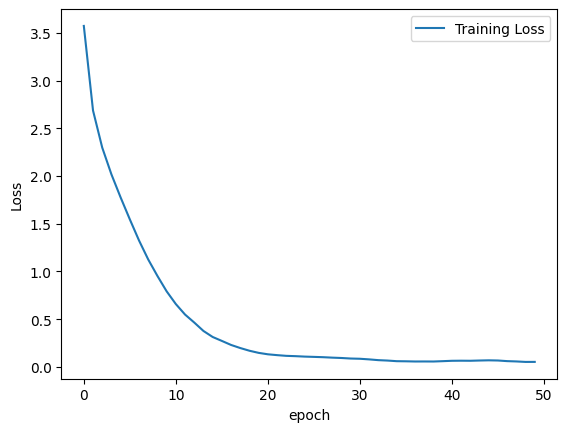

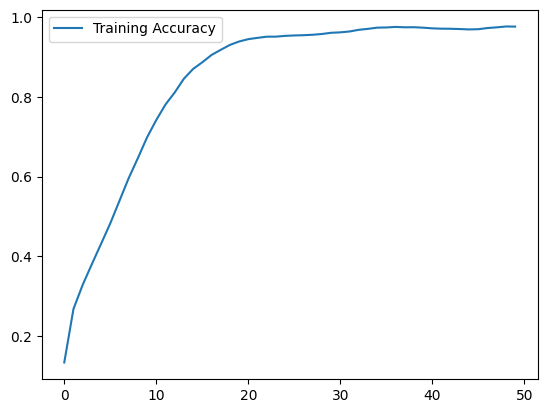

In [ ]:
# Plotting losses wrt epochs(time)
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="Training Loss")
plt.xlabel('epoch')
plt.ylabel('Loss')

#plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()
# Plotting accuracy wrt epochs(time)
plt.plot(history.history["accuracy"], label="Training Accuracy")
#plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [12]:
en_vocab = en_vectorization.get_vocabulary()
en_index_lookup = dict(zip(range(len(en_vocab)), en_vocab))
max_decoded_sentence_length = 65
#transformer.load_weights('xxx.h5')
#my_tf_saved_model = tf.keras.models.load_model('xxx.h5')
def decode_sequence(input_sentence):
    tokenized_input_sentence = ge_vectorization([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = en_vectorization([decoded_sentence])[:, :-1]
        predictions = transformer([tokenized_input_sentence, tokenized_target_sentence])
        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = en_index_lookup[sampled_token_index]
        if sampled_token ==  "end":
           sampled_token= "[end]"
           decoded_sentence += " " + sampled_token
           break
        else:
           decoded_sentence += " " + sampled_token
    return decoded_sentence
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
smoother = SmoothingFunction()
test_ge_texts = [pair[0] for pair in test_pairs]
test_en_texts = [pair[1] for pair in test_pairs]
#for i, test_sent in enumerate(test_sents):
i=0
count = 0
total_score = 0
for i in range(1419):
    input_sentence= test_ge_texts[i]
    target_sentence=test_en_texts[i]
    print(input_sentence)
    print(target_sentence)
    target_sentence=target_sentence.split()
    translated = decode_sequence(input_sentence)
    input_sentence =input_sentence.split()
    print(translated)
    translated =translated.split()
    blue_score = sentence_bleu(target_sentence, translated,smoothing_function=smoother.method7)
    count = count +1
    total_score = total_score + blue_score
    average_score=total_score/count
    print(i)
    print("1Average BLEU score",average_score)

ወዐርጉ ወኀደሩ ውስተ ቀርያት[ያ]ርም ውስተ ይሁዳ ወበእንተ ዝንቱ ተሰምየ ውእቱ መካን ትዕይንተ ዳን እስከ ዮም መንገለ ድኅሬሃ ለቀርያትያርም ።
[start] and went up and encamped at Kiriath-jearim in Judah. On this account that place is called tMahaneh-dan to this day; behold, it is west of vKiriath-jearim.   [end]


KeyError: ignored